In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

# Heading

## 
###
####

In [2]:
#!pip install keras==2.7.0

In [3]:
#!pip install tensorflow==2.7.0
#!pip install pydot

In [4]:
#!conda install python=3.7.6

In [5]:
orig=mnist

In [6]:
#!pip install pydot

In [7]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [8]:
 X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

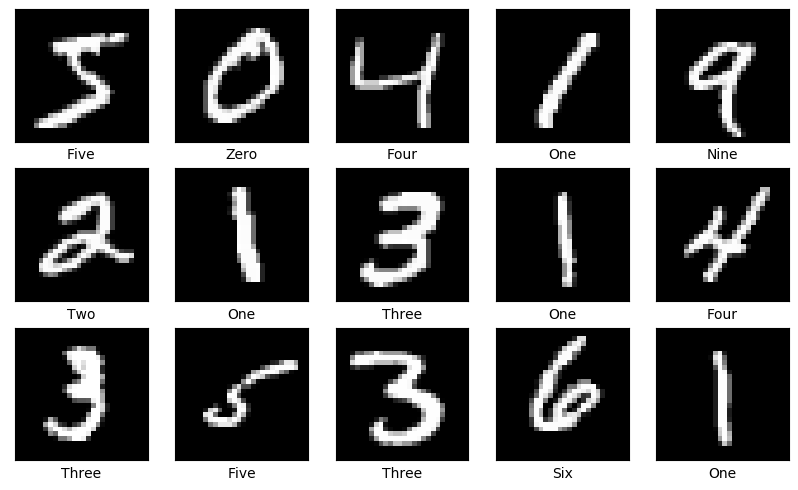

In [10]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [11]:
X_train_digit.shape

(60000, 28, 28)

# Preprocessing the input-Converting 3d to 2d

In [12]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [13]:
X_train_digit.shape

(60000, 784)

In [14]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_test_digit.shape

(10000,)

In [16]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [17]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
#!pip install scikit-learn==0.24.2

In [19]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [20]:
#param_number=output_channel_number*(input_channel_number+1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [21]:
#https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class

In [22]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [23]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 13s 8ms/step - loss: 1.5683 - accuracy: 0.8426 - val_loss: 0.4159 - val_accuracy: 0.8975
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2697 - accuracy: 0.9269 - val_loss: 0.2936 - val_accuracy: 0.9258
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2006 - accuracy: 0.9437 - val_loss: 0.2420 - val_accuracy: 0.9367
Epoch 4/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1590 - accuracy: 0.9558 - val_loss: 0.2237 - val_accuracy: 0.9445
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1334 - accuracy: 0.9612 - val_loss: 0.2025 - val_accuracy: 0.9541
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1209 - accuracy: 0.9654 - val_loss: 0.1832 - val_accuracy: 0.9559
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1141 - accuracy: 0.9683 - val_loss: 0.1803 - val_accuracy: 0.9602
Epoch

In [24]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 2s 4ms/step - loss: 0.1781 - accuracy: 0.9609


In [25]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9609


In [26]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


In [33]:
y_predict[8]

array([0.3567755 , 0.88691616, 0.1670242 , 0.89139795, 0.9994166 ,
       0.99831617, 0.81887865, 0.3027687 , 0.9904262 , 0.6880214 ],
      dtype=float32)

In [34]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [37]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [38]:
y_predicts[8]

4

In [39]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
y_pre=pd.DataFrame(y_predicts)

In [41]:
y_pre

,0
0,7
1,1
2,1
3,0
4,4
...,...
9995,1
9996,3
9997,4
9998,5


In [42]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

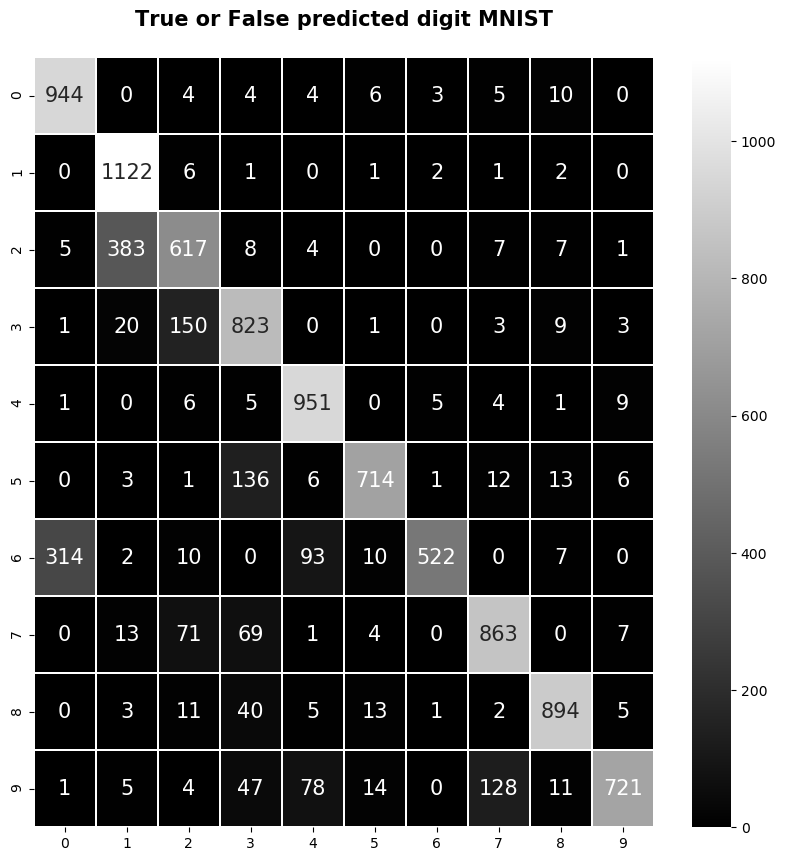

In [43]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       980
           1       0.72      0.99      0.84      1135
           2       0.70      0.60      0.65      1032
           3       0.73      0.81      0.77      1010
           4       0.83      0.97      0.90       982
           5       0.94      0.80      0.86       892
           6       0.98      0.54      0.70       958
           7       0.84      0.84      0.84      1028
           8       0.94      0.92      0.93       974
           9       0.96      0.71      0.82      1009

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.81     10000
weighted avg       0.83      0.82      0.81     10000



In [45]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


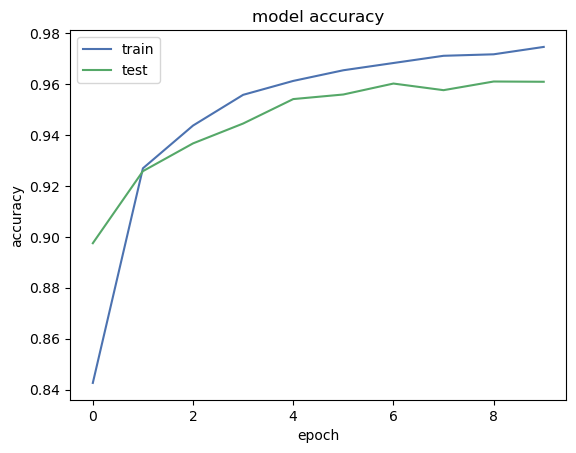

In [46]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


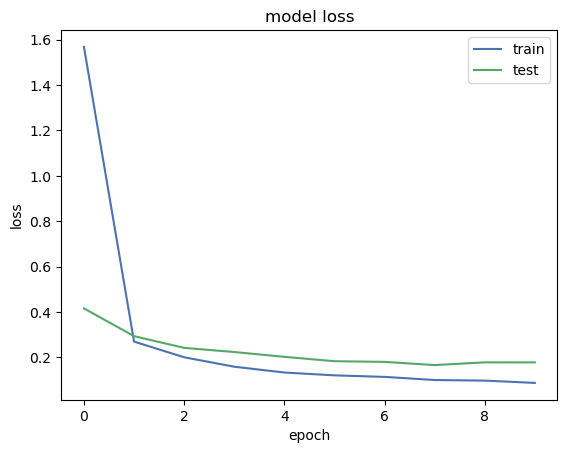

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [48]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [49]:
y_predicts_single[0]

1

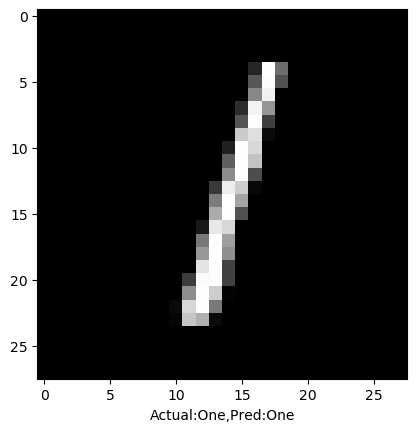

In [39]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [40]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)